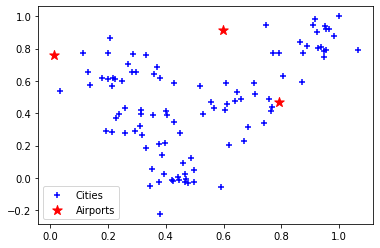

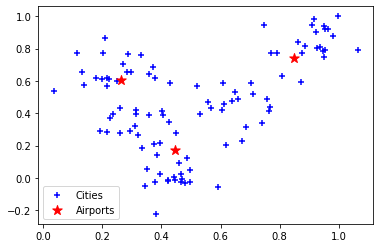

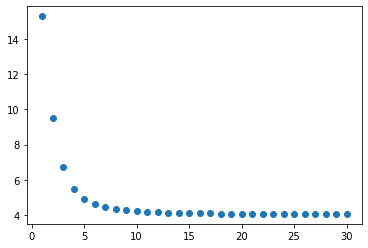

In [24]:
# Sydney Kao
# CECS 451
# Professor Moon
# Assignment 5

# Note: resubmission on 3/10

import random
import numpy as np
import math

# output format will be in [x_airport, y_airport, x_city, y_city]
def allocate(airports, cities):
    city_list = []
    for i in cities:
        a1 = pow(airports[0][0] - i[0], 2) + pow(airports[0][1] - i[1], 2)
        a2 = pow(airports[1][0] - i[0], 2) + pow(airports[1][1] - i[1], 2)
        a3 = pow(airports[2][0] - i[0], 2) + pow(airports[2][1] - i[1], 2)
        
        # find the smallest distance between the distances calculated
        min_distance = min(a1, a2, a3)
        
        if min_distance == a1:
            temp = (airports[0], i)
            city_list.append(temp)
        # error occurred here
        # elif min_distance == a1
        elif min_distance == a2:
            temp = (airports[1], i)
            city_list.append(temp)
        else:
            temp = (airports[2], i)
            city_list.append(temp)
        
    return city_list


# output is the number that results from the objective function that will be used in gradient function
def objectiveFunction(airports, cities, num_city):
    sum_list = []
    for i in range(num_city):
        if (cities[i][0] == airports[0]):
            temp = pow(airports[0][0] - cities[i][1][0], 2) + pow(airports[0][1] - cities[i][1][1], 2)
        elif (cities[i][0] == airports[1]):
            temp = pow(airports[1][0] - cities[i][1][0], 2) + pow(airports[1][1] - cities[i][1][1], 2)
        else:
            temp = pow(airports[2][0] - cities[i][1][0], 2) + pow(airports[2][1] - cities[i][1][1], 2)
            
        sum_list.append(temp)
    
    return sum(sum_list)


# output is a list of gradients that will be run through the formula 
def gradientFunction(airports, cities, num_city):
    # these represent the x and y coordinates of each airport
    dfdx1 = []
    dfdy1 = []
    dfdx2 = []
    dfdy2 = []
    dfdx3 = []
    dfdy3 = []
    gradients = []    
        
    for i in range(num_city):
        if (cities[i][0] == airports[0]):
            dfdx1.append(airports[0][0] - cities[i][1][0])
            dfdy1.append(airports[0][1] - cities[i][1][1])
        elif(cities[i][0] == airports[1]):
            dfdx2.append(airports[1][0] - cities[i][1][0])
            dfdy2.append(airports[1][1] - cities[i][1][1])
        else:
            dfdx3.append(airports[2][0] - cities[i][1][0])
            dfdy3.append(airports[2][1] - cities[i][1][1])
            
    # derivative formula
    gradients.append(2 * sum(dfdx1))
    gradients.append(2 * sum(dfdy1))
    gradients.append(2 * sum(dfdx2))
    gradients.append(2 * sum(dfdy2))
    gradients.append(2 * sum(dfdx3))
    gradients.append(2 * sum(dfdy3))
    
    return gradients


# output is a list of new airport locations
def gradientDecent(airports, gradients, alpha):
    # function: z' <- z - alpha(gradient)
    
    # airport 1
    x1 = airports[0][0] - alpha * gradients[0]
    y1 = airports[0][1] - alpha * gradients[1]
    airports[0] = (x1,y1)

    # airport 2
    x2 = airports[1][0] - alpha * gradients[2]
    y2 = airports[1][1] - alpha * gradients[3]
    airports[1] = (x2,y2)
    
    # airport 3
    x3 = airports[2][0] - alpha * gradients[4]
    y3 = airports[2][1] - alpha * gradients[5]
    airports[2] = (x3,y3)
    
    return airports
    

# plots the cities and airports before and after gradient decent, and the values from the objective function
if __name__ == "__main__":
    num_city = 100
    num_air = 3
    num_center = 5
    sigma = 0.1
    cities = set()
    airports = []

    for i in range(num_center):
        x = random.random()
        y = random.random()
        xc = np.random.normal(x, sigma, num_city//num_center)
        yc = np.random.normal(y, sigma, num_city//num_center)
        cities = cities.union(zip(xc, yc))


    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y)) 

    import matplotlib.pyplot as plt

    # before
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.show()
    
    # after gradient decent
    cities_list = []
    objective_results = []
    gradients = []

    # modified range from 100 to 30
    for i in range(30):
        temp = cities
        cities_list = allocate(airports, temp)
        gradients = gradientFunction(airports, cities_list, num_city)
        objective_result = objectiveFunction(airports, cities_list, num_city)
        objective_results.append(objective_result)
        # modified alpha value
        airports = gradientDecent(airports, gradients, 0.005)
        
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt.show()
    
    # plotting objective values
    plt.scatter(np.arange(1, 31), objective_results)
    plt.show()